In [ ]:
!pip install sentencepiece
!pip install tensorflow_text


     |████████████████████████████████| 1.2MB 16.4MB/s 
     |████████████████████████████████| 3.4MB 20.0MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text 
import tensorflow_datasets as tfds

In [ ]:
albert_url='https://tfhub.dev/tensorflow/albert_en_base/2'
encoder = hub.KerasLayer(albert_url)

preprocessor_url="https://tfhub.dev/tensorflow/albert_en_preprocess/3"
preprocessor = hub.KerasLayer(preprocessor_url)

In [ ]:

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
encoder_inputs = preprocessor(text_input)


In [ ]:
encoder_inputs

{'input_mask': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer_1')>,
 'input_type_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer_1')>,
 'input_word_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer_1')>}

In [ ]:
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]     
sequence_output = outputs["sequence_output"]
pooled_output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [ ]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete64HA42/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete64HA42/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete64HA42/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
embedding_model = tf.keras.Model(text_input, pooled_output)

In [ ]:
model = tf.keras.Sequential()
model.add(embedding_model)

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(128),
                    epochs=100,
                    validation_data=validation_data.batch(128),
                    verbose=1)

Epoch 1/100
118/118 [==============================] - 353s 3s/step - loss: 0.6644 - accuracy: 0.5740 - val_loss: 0.6584 - val_accuracy: 0.6932
Epoch 2/100
118/118 [==============================] - 348s 3s/step - loss: 0.5149 - accuracy: 0.7273 - val_loss: 0.7312 - val_accuracy: 0.6361
Epoch 3/100
118/118 [==============================] - 348s 3s/step - loss: 0.4925 - accuracy: 0.7492 - val_loss: 0.5016 - val_accuracy: 0.7592
Epoch 4/100
118/118 [==============================] - 347s 3s/step - loss: 0.4809 - accuracy: 0.7601 - val_loss: 0.5827 - val_accuracy: 0.7364
Epoch 5/100
118/118 [==============================] - 349s 3s/step - loss: 0.4694 - accuracy: 0.7604 - val_loss: 0.4834 - val_accuracy: 0.7535
Epoch 6/100
118/118 [==============================] - 349s 3s/step - loss: 0.4643 - accuracy: 0.7667 - val_loss: 0.6989 - val_accuracy: 0.6039
Epoch 7/100
118/118 [==============================] - 347s 3s/step - loss: 0.4698 - accuracy: 0.7620 - val_loss: 0.5832 - val_accuracy:

<Figure size 432x288 with 0 Axes>

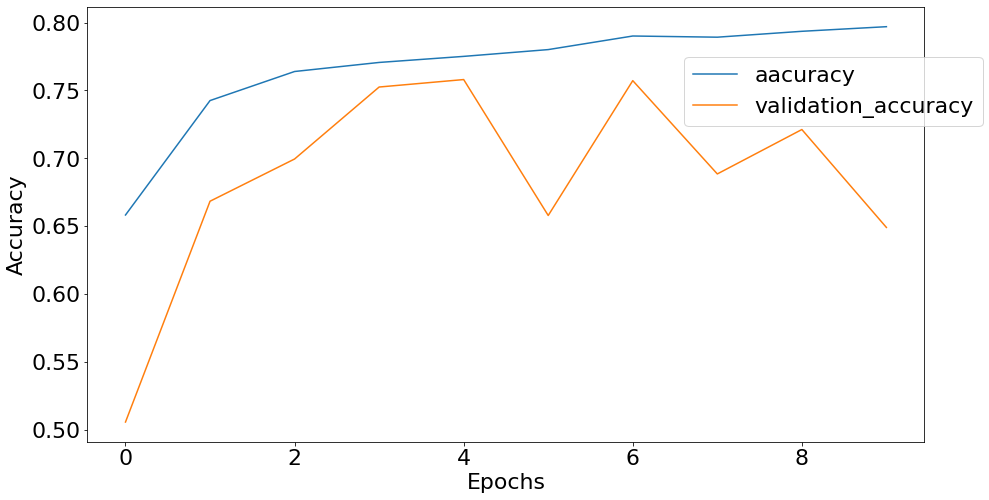

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'size'   : 22}
plt.tight_layout()
matplotlib.rc('font', **font)
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'],label='aacuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend(bbox_to_anchor=(0.7, 0.7))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('foo1.png')
plt.show()

In [ ]:
albert_url='https://tfhub.dev/tensorflow/albert_en_base/2'
encoder = hub.KerasLayer(albert_url,trainable=True)

preprocessor_url="https://tfhub.dev/tensorflow/albert_en_preprocess/3"
preprocessor = hub.KerasLayer(preprocessor_url)

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
encoder_inputs = preprocessor(text_input)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]     
sequence_output = outputs["sequence_output"]
embedding_model = tf.keras.Model(text_input, pooled_output)
model2 = tf.keras.Sequential()
model2.add(embedding_model)
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(30, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(1))
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history2 = model2.fit(train_data.shuffle(10000).batch(128),
                    epochs=10,
                    validation_data=validation_data.batch(128),
                    verbose=1)

Epoch 1/10


In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.plot(history2.history['accuracy'],label='accuracy_finetuned')
plt.plot(history2.history['val_accuracy'],label='validation_accuracy_finetuned')
plt.legend(bbox_to_anchor=(0.7, 0.7))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('foo2.png')
plt.show()